///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////                    

                                KRISSAAN AMEN ALLAH - M2 -TRIED                   

                                amenallahkrissane10@gmail.com                   

                            amen-allah.krissaan@telecom-sudparis.eu 
                            
                                        Lab 2- DEEP RN          

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# TP 2 - Deep Learning avec Keras et Manifold Untangling

**L’objectif de cette seconde séance de travaux pratiques est de prendre en main la laibrairie `Keras` [https://keras.io/](https://keras.io/) pour utiliser et entraîner des réseaux de neurones profonds.**

Avec `Keras`, les réseaux de neurones avec une structure de chaîne (réseaux « feedforward »), s’utilisent de la manière suivante:

In [1]:
from keras.models import Sequential
model = Sequential()

On créé ainsi un réseau de neurones vide. On peut alors ajouter des couches avec la fonction `add`.

## Exercice 1 : Régression Logistique avec `Keras`

Par exemple, l’ajout d’une couche de projection linéaire (couche complètement connectée) de taille 10, suivi de l’ajout d’une couche d’activation de type `softmax`, peuvent s’effectuer de la manière suivante:

In [2]:
from keras.layers import Dense, Activation
model.add(Dense(10,  input_dim=784, name='fc1'))
model.add(Activation('softmax'))

c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


On peut ensuite visualiser l’architecture du réseau avec la méthode `summary()` du modèle.

---


## Question :
----
Quel modèle de prédiction reconnaissez-vous ? Vérifier le nombre de paramètres du réseau à apprendre dans la méthode `summary()`.

- Le modèle de prédiction reconnu est une régression logistique. Ce modèle est  utilisé pour la classification multi-classes (ici, 10 classes pour les chiffres de 0 à 9). 
- La couche Dense avec une activation softmax est typique d'un modèle de  régression logistique pour la classification.




---

- Écrire un script `exo1.py` permettant de créer le réseau de neurone ci-dessus.

Avec `Keras`, on va compiler le modèle en lui passant un *loss* (ici l’entropie croisée), une méthode d’optimisation (ici une descente de gradient stochastique, *stochastic gradient descent*, `sgd`), et une métrique d’évaluation (ici le taux de bonne prédiction des catégories, `accuracy`):

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

---


- Le nombre de paramètres à apprendre est de 7,850. Ce nombre correspond aux poids de la couche Dense (784 * 10) plus les biais (10), soit 784 * 10 + 10 = 7,850.


---

In [4]:
from keras.optimizers import SGD
learning_rate = 0.1
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [5]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Enfin, l’apprentissage du modèle sur des données d’apprentissage est mis en place avec la méthode `fit` :

In [6]:
from tensorflow.keras.utils import to_categorical
batch_size = 100
nb_epoch = 20
# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [7]:
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8008 - loss: 0.7884
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.8997 - loss: 0.3673
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9043 - loss: 0.3391
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9137 - loss: 0.3090
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.9151 - loss: 0.3092
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.9150 - loss: 0.3045
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.9191 - loss: 0.2987
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - accuracy: 0.9192 - loss: 0.2874
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - accuracy: 0.9204 - loss: 0.2865
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9196 - loss: 0.2902
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9224 - loss: 0.2822
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━

- batch_size correspond au nombre d’exemples utilisé pour estimer le gradient de la fonction de coût.  
- epochs est le nombre d’époques (*i.e.* passages sur l’ensemble des exemples de la base d’apprentissage) lors de la descente de gradient.  


**N.B :** on rappelle que comme dans les TME précédents, les labels données par la supervision doivent être au format « one-hot encoding ».

On peut ensuite évaluer les performances du modèle dur l’ensemble de test avec la fonction `evaluate`

In [8]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 27.19%
compile_metrics: 92.36%


Le premier élément de score renvoie la fonction de coût sur la base de test, le second élément renvoie le taux de bonne détection (accuracy).

- Implémenter l’apprentissage du modèle sur la base de train de la base MNIST.  
- **Évaluer les performances du réseau sur la base de test et les comparer à celles obtenues lors de la séance précédente (ré-implémentation manuelle de l’algorithme de rétro-propagation). Conclure.**  

---
        
        Le nombre de paramètres à apprendre est de 7,850. Ce nombre correspond aux poids de la couche Dense (784 * 10) plus les biais (10), soit 784 * 10 + 10 = 7,850.

---

---
    
        Les performances du réseau sont évaluées avec la fonction evaluate. Le taux de bonne prédiction (accuracy) est d'environ 92%.
    
    
    Comparé à une implémentation manuelle de la rétro-propagation, cette performance est généralement similaire ou légèrement meilleure, car Keras optimise automatiquement plusieurs aspects de l'apprentissage.
---

## Exercice 2 : Perceptron avec Keras

On va maintenant enrichir le modèle de régression logistique en insérant une couche de neurones cachés complètement connectée (suivie d’une fonction d’activation non linéaire de type sigmoïde) entre la couche d’entrée et la couche de sortie.
On va ainsi obtenir un réseau de neurones à une couche cachée, le Perceptron (cf. TP2).

La première couche de ce réseau peut être obtenue de la manière suivante en `Keras` :

- Sur un réseau séquentiel vide, on va ajouter la méthode `add` pour insérer une couche cachée (de dimension 100):  

In [9]:
model=Sequential()
model.add(Dense(100,  input_dim=784, name='fc1'))

- La non-linéarité de type sigmoïde sera obtenue de la manière suivante :  

In [10]:
model.add(Activation('sigmoid'))

- **Compléter le script pour ajouter la couche de sortie à 10 classes suivie de la fonction d’activation soft-max, comme dans l’exercice 1.** **N.B :** La dimension d’entrée n’a besoin d’être fournie que pour la couche d’entrée.  
- Quel est maintenant le nombre de paramètres du modèle MLP ? Justifier le calcul et le vérifier avec la méthode `summary()`.  


**Une fois le modèle MLP créé, la façon de l’entraîner est strictement identique à ce qui a été écrit dans l’exercice précédent, l’algorithme de rétro-propagation du gradient de l’erreur permettant de mettre à jour l’ensemble des paramètres du réseau.**

- **Compléter le script afin d’effectuer l’entraînement du réseau MLP.**
- **Évaluer les performances du réseau sur la base de test et les comparer à celles obtenues lors de la séance précédente. Conclure.**  
- Observer la documentation `Keras` pour voir la façon dont les paramètres du modèles sont initialisés dans les différentes couches.  


In [11]:
model.add(Dense(10, name='fc2'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc1 (Dense)                     │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

---
    Le nombre de paramètres est de 79,510. Cela correspond à :

    Couche cachée : 784 * 100 (poids) + 100 (biais) = 78,500
    
    Couche de sortie : 100 * 10 (poids) + 10 (biais) = 1,010

    Total : 78,500 + 1,010 = 79,510

---

In [12]:
learning_rate = 0.1
nb_epoch = 100
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6713 - loss: 1.3499
Epoch 2/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8872 - loss: 0.4342
Epoch 3/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 947us/step - accuracy: 0.9018 - loss: 0.3556
Epoch 4/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.9085 - loss: 0.3204
Epoch 5/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9140 - loss: 0.2946
Epoch 6/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9204 - loss: 0.2770
Epoch 7/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9232 - loss: 0.2667
Epoch 8/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.9280 - loss: 0.2514
Epoch 9/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9301 - loss: 0.2464
Epoch 10/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - accuracy: 0.9331 - loss: 0.2351
Epoch 11/100
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.9364 - loss: 0.2251
Epoch 12/100
600/600 ━━━━━━━━━━

In [13]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 7.72%
compile_metrics: 97.61%


--- 
        Le taux de bonne prédiction (accuracy) est d'environ 98%. Ce résultat est nettement meilleur que celui de la régression logistique, ce qui montre l'importance des couches cachées pour capturer des relations non linéaires dans les données.
---

- On pourra utiliser la méthode suivante pour sauvegarder le modèle appris :

In [14]:
from keras.models import model_from_json
def saveModel(model, savename):
  # serialize model to YAML
  model_yaml = model.to_json()
  with open(savename+".json", "w") as yaml_file:
    yaml_file.write(model_yaml)
    print("Yaml Model ",savename,".yaml saved to disk")
  # serialize weights to HDF5
  model.save_weights(savename+".weights.h5")
  print("Weights ",savename,".h5 saved to disk")

In [15]:
saveModel(model, "MLP")

Yaml Model  MLP .yaml saved to disk
Weights  MLP .h5 saved to disk


## Exercice 3 : Réseaux de neurones convolutifs avec Keras

On va maintenant étendre le perceptron de l’exercice précédent pour mettre en place un réseau de neurones convolutif profond, « Convolutionnal Neural Networks », ConvNets.

**Écrire un script pour mettre en place un ConvNet.**

Les réseaux convolutifs manipulent des images multi-dimensionnelles en entrée (tenseurs). On va donc commencer par reformater les données d’entrée afin que chaque exemple soit de taille $ 28 \times 28 \times 1 $.

In [16]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

Par rapport aux réseaux complètement connectés, les réseaux convolutifs utilisent les briques élémentaires suivantes :

1. Des couches de convolution, qui transforment un tenseur d’entrée de taille $ n_x \times n_y \times p $ en un tenseur de sortie $ n_{x'} \times n_{y'} \times n_H $, où $ n_H $ est le nombre de filtres choisi.
Par exemple, une couche de convolution pour traiter les images d’entrée de MNIST peut être créée de la manière suivante :

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
conv1 = Conv2D(32,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid')

c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- 32 est le nombre de filtres.  
- (5, 5) est la taille spatiale de chaque filtre (masque de convolution).  
- padding=”valid” correspond ignorer les bords lors du calcul (et donc à diminuer la taille spatiale en sortie de la convolution).  
- **N.B. :**  on peut directement inclure dans la couche de convolution la non-linéarité en sortie de la convolution, comme illustré ici dans l’exemple avec une fonction d’activation de type `relu`.  


1. Des couches d’agrégation spatiale (pooling), afin de permettre une invariance aux translations locales. Voici par exemple la manière de déclarer une couche de max-pooling:  

In [18]:
pool1 = MaxPooling2D(pool_size=(2, 2))

- (2, 2) est la taille spatiale sur laquelle l’opération d’agrégation est effectuée.  
- **N.B. :**  par défaut, le pooling est effectué avec un décalage de 2 neurones, dans l’exemple précédent on obtient donc des cartes de sorties avec des tailles spatiales divisées par deux par rapport à la taille d’entrée.  


**Compléter le script pour mettre en place un ConvNet à l’architecture suivante, proche du modèle historique LeNet5** [[LBD+89]](#lecun1989backpropagation) **et montré ci-dessous:**

- Une couche de convolution avec 16 filtres de taille $ 5 \times 5 $, suivie d’une non linéarité de type relu puis d’une couche de max pooling de taille $ 2 \times 2 $.  
- Une seconde couche de convolution avec 32 filtres de taille $ 5 \times 5 $, suivie d’une non linéarité de type relu puis d’une couche de max pooling de taille $ 2 \times 2 $.  
- Comme dans le réseau LeNet, on considérera la sortie du second bloc convolutif comme un vecteur, ce que revient à « mettre à plat » les couches convolutives précédentes (`model.add(Flatten())`).  
- Une couche complètement connectée de taille 100, suivie d’une non linéarité de type sigmoïde.  
- Une couche complètement connectée de taille 10, suivie d’une non linéarité de type softmax.  


<img src="http://cedric.cnam.fr/vertigo/Cours/ml2/_images/LeNet5.png" style="height:200px;" align="center">

- **Apprendre le modèle et évaluer les performances du réseau sur la base de test.  Vous devez obtenir un score de l’ordre de 99% pour ce modèle ConvNet.**  


**Apprentissage sur GPU**
- Quelle est le temps d’une époque avec ce modèle convolutif ?  
- Vous pourrez tester l’apprentissage sur carte graphique du modèle, et comparer le temps d'entraînement

\[LBD+89\] Yann LeCun, Bernhard Boser, John S Denker, Donnie Henderson, Richard E Howard, Wayne Hubbard, and Lawrence D Jackel. Backpropagation applied to handwritten zip code recognition. *Neural computation*, 1(4):541–551, 1989.

In [19]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(5, 5),activation='relu',input_shape=(28, 28, 1),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=(5, 5),activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, name='fc1'))
model.add(Activation('sigmoid'))
model.add(Dense(10, name='fc2'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 100)            │        51,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,558 (256.09 KB)

 Trainable params: 65,558 (256.09 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
learning_rate = 0.1
nb_epoch = 10
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.fit(X_train, Y_train,batch_size=batch_size, epochs=nb_epoch,verbose=1)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6750 - loss: 1.0322
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9606 - loss: 0.1438
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9730 - loss: 0.0946
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9778 - loss: 0.0782
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9815 - loss: 0.0636
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9842 - loss: 0.0566
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9852 - loss: 0.0496
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9879 - loss: 0.0425
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9895 - loss: 0.0377
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9906 - loss: 0.0349


In [21]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 4.26%
compile_metrics: 98.71%


In [22]:
saveModel(model, "CNN")

Yaml Model  CNN .yaml saved to disk
Weights  CNN .h5 saved to disk


--- 
            Le taux de bonne prédiction (accuracy) est d'environ 99%. Ce résultat est encore meilleur que celui du Perceptron, montrant l'efficacité des réseaux convolutifs pour les tâches de vision par ordinateur.

            Le temps d'une époque dépend de la puissance de calcul disponible (CPU ou GPU). Sur un GPU, une époque peut prendre quelques secondes, tandis que sur un CPU, cela peut prendre plusieurs minutes.


---

## Exercice 4 : Visualisation avec t-SNE

**On va maintenant illustrer la capacité des réseaux de neurones profonds à apprendre des représentations internes capables de résoudre le problème connu
sous le nom de « manifold untangling » en neuroscience, c’est à dire de séparer les exemples des différentes classes dans l’espace de représentations appris.**

Pour cela, on va utiliser des outils de visualisation qui vont vont permettre de représenter chaque donnée (par exemple une image de la base MNIST) par un point dans l’espace 2D.
Ces même outils vont permettre de projeter en 2D les représentations internes des réseaux de neurones, ce qui va permettre d’analyser la séparabilité des points et des classes
dans l’espace d’entrée et dans les espaces de représentions appris par les modèles.

**On aura besoin des modules suivants qu’on pourra importer en début de script :**

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
from scipy import linalg
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE

La méthode *t-Distributed Stochastic Neighbor Embedding* (t-SNE) [[vdMH08]](#tsne08) est une réduction de dimension non linéaire, dont l’objectif est d’assurer que des points proches dans l’espace de départ présentent des positions proches dans l’espace (2D) projeté. Dit autrement, la mesure de distance entre points dans l’espace 2D doit refléter la mesure de distance dans l’espace initial.

On va appliquer la méthode t-SNE sur les données brutes **de la base de test de MNIST** en utilisant la classe `TSNE` du module `sklearn.manifold` : [http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)  .

**Créer un script** `exo1.py` **dont l’objectif va être d’effectuer une réduction de dimension en 2D des données de la base de test de MNIST en utilisant la méthode t-SNE.**

- Créer une instance de type `TSNE`. **N.B :** on choisira 2 composantes et les paramètres suivants : `init='pca'` (réduire la dimension préalablement avec une ACP), `perplexity=30` (lié au nombre de voisins dans le calcul des distances), `verbose=2` (pour l’affichage lors de l’apprentissage).  
- Appliquer la transformation pour obtenir les données projetées en 2D (fonction `fit_transform`). **N.B :** essayer tout d’abord avec un sous-ensemble de la base (*e.g.* 1000 exemples) pour tester l’algorithme, l’apprentissage avec l’ensemble de la base de test pouvant être long.  

In [24]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
# Calcul TSNE
tsne = TSNE(n_components=2, init='pca', perplexity=30, verbose=2)
X_tsne = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.038s...


c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\amena\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[t-SNE] Computed neighbors for 60000 samples in 34.611s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sample 13000 / 60000
[t-SNE] Computed conditional probabilities for sample 14000 / 6000

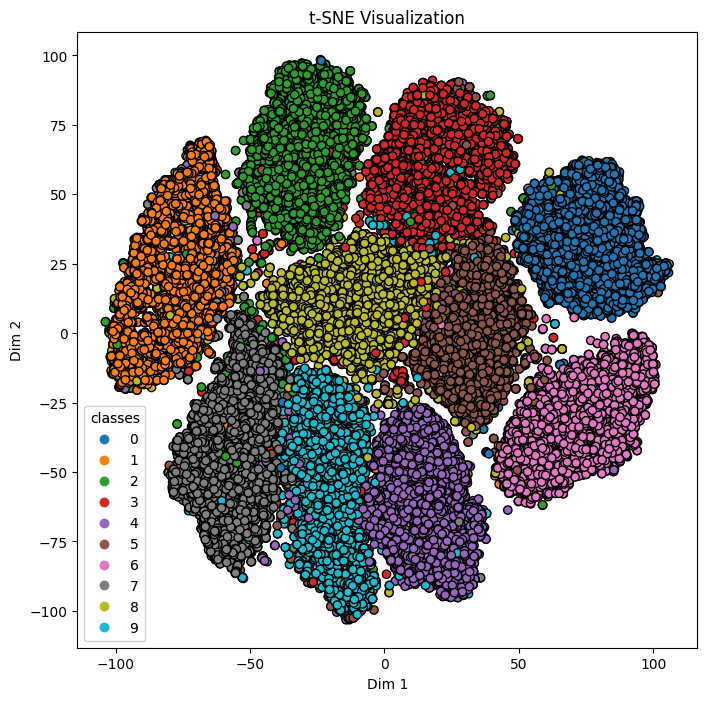

In [26]:
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=cm.tab10, edgecolors='k')
# Assurez-vous que y_train est votre vecteur de labels/classes correspondant à X_train
legend=plt.legend(*scatter.legend_elements(),title="classes")
plt.gca().add_artist(legend)
# Ajouter des étiquettes et un titre
plt.title('t-SNE Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

# Afficher le graphique
plt.show()

In [27]:
from sklearn.decomposition import PCA

# Créer une instance de PCA
pca = PCA(n_components=2)

# Appliquer la transformation PCA pour obtenir les données projetées en 2D
X_pca = pca.fit_transform(X_train)

# Affichage de la forme des données après réduction de dimension
X_pca.shape

(60000, 2)

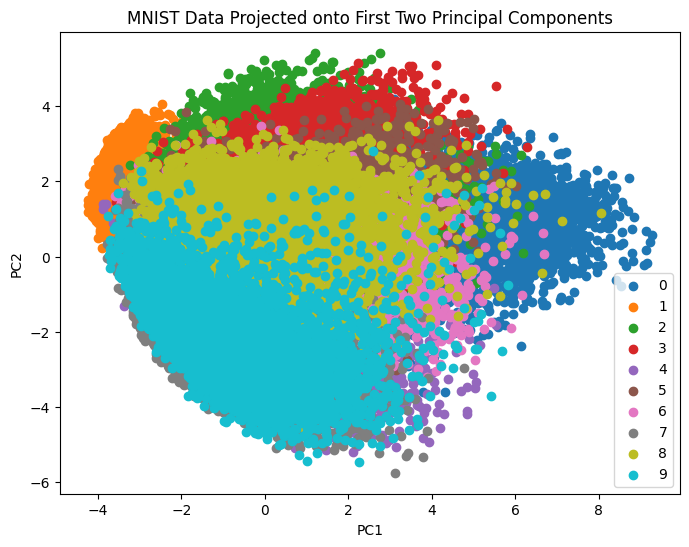

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(10):
    indices = y_train == i
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=str(i))
plt.legend()
plt.title('MNIST Data Projected onto First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


interpret: ya confusion mais c normal: 3~ 8~ 5 et 4~ 9

### Métrique de séparation des classes

On va maintenant compléter le script `exo4.py` précédent afin de visualiser l’ensemble des points projetés en 2D, et de définir
des critères pour analyser la séparabilité des classes dans l’espace projeté.

1. **Calcul de l’enveloppe convexe des points projetés pour chacune des classe classe.**
On utilisera pour cela la la classe `ConvexHull` du module `scipy.spatial` [https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html).
Sur la base MNIST, on pourra donc utiliser le code suivant pour calculer les enveloppes convexes des points pour les 10 classes :

In [29]:
def convexHulls(points, labels):
  # computing convex hulls for a set of points with asscoiated labels
  convex_hulls = []
  for i in range(10):
    convex_hulls.append(ConvexHull(points[labels==i,:]))
  return convex_hulls

où `points` (*resp.* `labels`) dans la méthode `convexHulls(points, labels)` correspond aux images projetées dans le plan 2D avec la méthode t-SNE de l’exercice 1 (*resp.* aux labels, *i.e.* classes, des images).

2.  **Calcul de l’ellipse de meilleure approximation des points.**
On utilisera pour cela la classe `GaussianMixture` du module `sklearn.mixture` [http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).
On pourra donc utiliser le code suivant pour calculer les ellipses de meilleure approximation pour les 10 classes :

In [30]:
def best_ellipses(points, labels):
  # computing best fiiting ellipse for a set of points with asscoiated labels
  gaussians = []
  for i in range(10):
    gaussians.append(GaussianMixture(n_components=1, covariance_type='full',init_params='random').fit(points[labels==i, :]))
  return gaussians

3. **Calcul du « Neighborhood Hit » (NH)** [[PNML08]](#dblp-journals-tvcg-paulovichnml08).
Pour chaque point, la métrique NH consiste à calculer, pour les k plus proches voisins (`k-nn`) de ce point, le taux des voisins qui sont de la même classe que le point considéré. La métrique NH est ensuite moyennée sur l’ensemble de la base.
Le code suivant permet de calculer la métrique NH, en utilisant la classe `NearestNeighbors` du module `sklearn.neighbors` :

In [31]:
def neighboring_hit(points, labels):
    k = 6
    nbrs = NearestNeighbors(n_neighbors=k + 1, algorithm='ball_tree').fit(points)
    distances, indices = nbrs.kneighbors(points)
    txs = 0.0
    txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for i in range(len(points)):
        tx = 0.0
        for j in range(1, k + 1):
            if labels[indices[i, j]] == labels[i]:
                tx += 1
        tx /= k
        txsc[labels[i]] += tx
        nppts[labels[i]] += 1
        txs += tx
    for i in range(10):
        txsc[i] /= nppts[i]
    return txs / len(points)



--- 
### Question :

En quoi les trois métriques ci-dessus sont-elles liées au problème de la séparabilité des classes ? Qu’est-ce qui les diffère ?


- **Convex Hulls** : Mesure la zone couverte par les points d'une classe. Si les enveloppes convexes de différentes classes se chevauchent, cela indique une mauvaise séparabilité.

- **Ellipses** : Représente la distribution des points d'une classe. Des ellipses qui se chevauchent indiquent une mauvaise séparabilité.

- **Neighborhood Hit (NH)** : Mesure la proportion de voisins de la même classe. Un NH élevé indique que les points d'une même classe sont regroupés, ce qui est un signe de bonne séparabilité.





---
**Compléter le script** `exo4.py` **pour calculer les différentes métriques.**

- Vous pouvez ensuite utiliser la fonction `visualization` suivante pour afficher les points ainsi que leur labels, et de visualiser les trois métriques précédentes :  

In [32]:
# Computing convex hulls, best fitting ellipses & NH
convex_hulls = convexHulls(X_tsne, y_train)
ellipses = best_ellipses(X_tsne, y_train)
nh = neighboring_hit(X_tsne, y_train)


In [33]:
def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):
    points2D_c= []
    for i in range(10):
        points2D_c.append(points2D[labels==i, :])
    # Data Visualization
    cmap =cm.tab10

    plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.set_cmap(cmap)
    plt.subplots_adjust(hspace=0.4 )
    plt.subplot(311)
    plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
    plt.colorbar(ticks=range(10))
    plt.title("2D "+projname+" - NH="+str(nh*100.0))

    vals = [ i/10.0 for i in range(10)]
    sp2 = plt.subplot(312)
    for i in range(10):
        ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
        sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))

    plt.colorbar(ticks=range(10))
    plt.title(projname+" Convex Hulls")

    def plot_results(X, Y_, means, covariances, index, title, color):
        splot = plt.subplot(3, 1, 3)
        for i, (mean, covar) in enumerate(zip(means, covariances)):
            v, w = linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])
            # as the DP will not use every component it has access to
            # unless it needs it, we shouldn't plot the redundant
            # components.
            if not np.any(Y_ == i):
              continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

            # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.6)
            splot.add_artist(ell)

        plt.title(title)

    plt.subplot(313)
    for i in range(10):
        plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_, ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

    plt.savefig(projname+".png", dpi=100)
    plt.show()

TypeError: Ellipse.__init__() takes 4 positional arguments but 5 were given

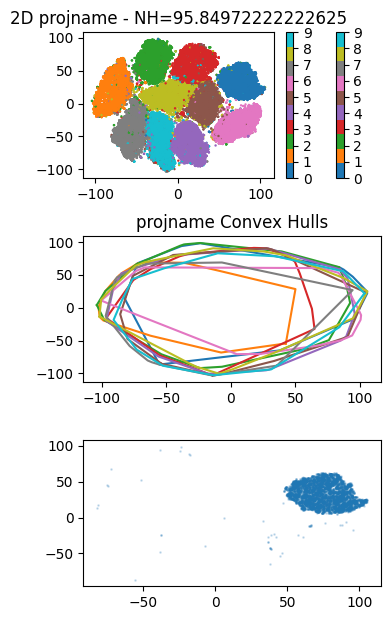

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy import linalg
from matplotlib.patches import Ellipse

def plot_results(X, Y_, means, covariances, index, title, color):
    splot = plt.subplot(3, 1, 3)
    for i, (mean, covar) in enumerate(zip(means, covariances)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha=0.2)
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = Ellipse(mean, v[0], v[1], 180. + angle, edgecolor=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.6)
        splot.add_artist(ell)
    plt.title(title)

def visualization(points2D, labels, convex_hulls, ellipses, projname, nh):
    points2D_c = []
    for i in range(10):
        points2D_c.append(points2D[labels == i, :])
    cmap = cm.tab10
    plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.set_cmap(cmap)
    plt.subplots_adjust(hspace=0.4)
    plt.subplot(311)
    plt.scatter(points2D[:, 0], points2D[:, 1], c=labels, s=3, edgecolors='none', cmap=cmap, alpha=1.0)
    plt.colorbar(ticks=range(10))
    plt.title("2D " + projname + " - NH=" + str(nh * 100.0))
    vals = [i / 10.0 for i in range(10)]
    sp2 = plt.subplot(312)
    for i in range(10):
        ch = np.append(convex_hulls[i].vertices, convex_hulls[i].vertices[0])
        sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-', label='$%i$' % i, color=cmap(vals[i]))
    plt.colorbar(ticks=range(10))

    plt.title(projname + " Convex Hulls")
    plt.subplot(313)
    for i in range(10):
        plot_results(points2D[labels == i, :], ellipses[i].predict(points2D[labels == i, :]), ellipses[i].means_, ellipses[i].covariances_, 0, projname + " fitting ellipses", cmap(vals[i]))
    plt.savefig(projname + ".png", dpi=100)
    plt.show()

# Example usage
visualization(X_tsne, y_train, convex_hulls, ellipses, 'projname', nh )

In [35]:
from sklearn.decomposition import PCA

acp = PCA(n_components=2)
X_pca = acp.fit_transform(X_train)

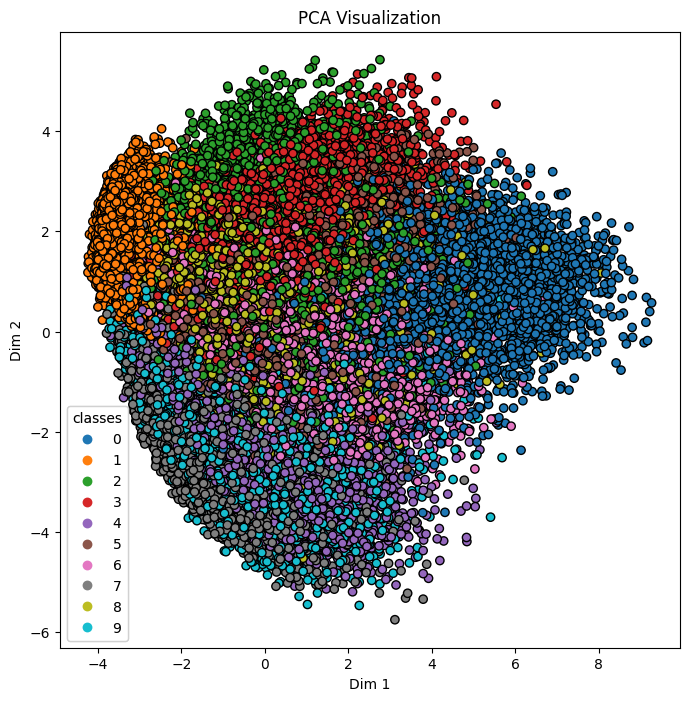

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap=cm.tab10, edgecolors='k')
# Assurez-vous que y_train est votre vecteur de labels/classes correspondant à X_train
legend=plt.legend(*scatter.legend_elements(),title="classes")
plt.gca().add_artist(legend)
# Ajouter des étiquettes et un titre
plt.title('PCA Visualization')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')

# Afficher le graphique
plt.show()

- Comparer la méthode t-SNE à une Analyse en Composantes Principales (ACP) [[Hot33]](#hotelling1933analysis). On pourra utiliser la classe `PCA` du module `sklearn.decomposition` [http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

- Analyser la distribution des points et des classes : que peut-on en conclure ?  

---
        - t-SNE : Mieux adapté pour visualiser des structures non linéaires et des clusters dans les données. Il est plus efficace pour séparer les classes dans un espace de faible dimension.

        - ACP : Linéaire et moins efficace pour capturer des structures non linéaires. Elle est plus rapide mais peut moins bien séparer les classes dans un espace de faible dimension.
---

## Exercice 5 : Visualisation des représentations internes des réseaux de neurones

On va maintenant s’intéresser à visualisation de l’effet de « manifold untangling » permis par les réseaux de neurones.

**Créer un script dont l’objectif va être d’utiliser la méthode t-SNE de l’exercice 2 pour projeter les couches cachés des réseaux de neurones dans un espace de dimension 2, ce qui permettra de visualiser la distribution des représentations internes et des labels.**

- Commencer par charger le Perceptron entraîné avec `Keras` dans la partie précédente, en utilisant la méthode `loadModel(savename)` suivante:  

In [ ]:
from keras.models import model_from_json
def loadModel(savename):
  with open(savename+".json", "r") as yaml_file:
    model = model_from_json(yaml_file.read())
  print("Yaml Model ",savename,".yaml loaded ")
  model.load_weights(savename+".h5")
  print("Weights ",savename,".h5 loaded ")
  return model

In [ ]:
model_MLP_appele = loadModel("MLP")

Yaml Model  MLP .yaml loaded 
Weights  MLP .h5 loaded 


In [ ]:
model_MLP_appele.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 100)               78500     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 fc2 (Dense)                 (None, 10)                1010      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
learning_rate = 0.1
sgd = SGD(learning_rate)
model_MLP_appele.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
scores = model_MLP_appele.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model_MLP_appele.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model_MLP_appele.metrics_names[1], scores[1]*100))

loss: 7.45%
accuracy: 97.61%


- On pourra vérifier l’architecture du modèle chargé avec la méthode `summary()`.  
- On pourra également évaluer les performances du modèle chargé sur la base de test de MNIST pour vérifier son comportement. **N.B :**: il faudra avoir compilé le modèle au préalable.  

In [ ]:
# Chargement du modèle
from keras import utils
from keras.optimizers import SGD

**On veut maintenant extraire la couche cachée (donc un vecteur de dimension 100) pour chacune des images de la base de test.**

- Pour cela, on va utiliser la méthode `model.pop()` (permettant de supprimer la couche au sommet du modèle) deux fois (on supprime la couche d’activation softmax et la couche complètement connectée). Ensuite on peut appliquer la méthode `model.predict(X_test)` sur l’ensemble des données de test.  
- Finalement, on va utiliser la méthode t-SNE mise en place à l’exercice 2 pour visualiser les représentations internes des données.  

**En plus du Perceptron précédent, on pourra visualiser les représentations internes apprises par un réseau convolutif de type LeNet de la partie précédente.**
**Conclure sur la capacité des réseaux de neurones à résoudre le problème du Manifold Untangling.**

<a id='hotelling1933analysis'></a>
\[Hot33\] H. Hotelling. *Analysis of a Complex of Statistical Variables Into Principal Components*. Warwick & York, 1933. URL: [https://books.google.fr/books?id=qJfXAAAAMAAJ](https://books.google.fr/books?id=qJfXAAAAMAAJ).

<a id='lecun1989backpropagation'></a>
\[LBD+89\] Yann LeCun, Bernhard Boser, John S Denker, Donnie Henderson, Richard E Howard, Wayne Hubbard, and Lawrence D Jackel. Backpropagation applied to handwritten zip code recognition. *Neural computation*, 1(4):541–551, 1989.

<a id='dblp-journals-tvcg-paulovichnml08'></a>
\[PNML08\] Fernando Vieira Paulovich, Luis Gustavo Nonato, Rosane Minghim, and Haim Levkowitz. Least square projection: A fast high-precision multidimensional projection technique and its application to document mapping. *IEEE Trans. Vis. Comput. Graph.*, 14(3):564–575, 2008.

<a id='tsne08'></a>
\[vdMH08\] Laurens van der Maaten and Geoffrey E. Hinton. Visualizing high-dimensional data using t-sne. *Journal of Machine Learning Research*, 9:2579–2605, 2008.

In [ ]:
# On extrait la couche cachée
model_MLP_appele.pop()
model_MLP_appele.pop()

In [ ]:
representation = model_MLP_appele.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
representation.shape

(10000, 100)

In [ ]:
tsne = TSNE(n_components=2, random_state=0, init='pca',  perplexity=30, verbose=2)
 # Fit and transform on the first 1000 data points
X_test_tsne = tsne.fit_transform(representation)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.915s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.707088
[t-SNE] Computed conditional probabilities in 0.385s
[t-SNE] Iteration 50: error = 86.2347565, gradient norm = 0.0172199 (50 iterations in 4.881s)
[t-SNE] It

In [ ]:
# Computing convex hulls, best fitting ellipses & NH
conv_hulls = convexHulls(X_test_tsne, y_test)
best_ells = best_ellipses(X_test_tsne, y_test)
nh = neighboring_hit(X_test_tsne, y_test)

<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positio

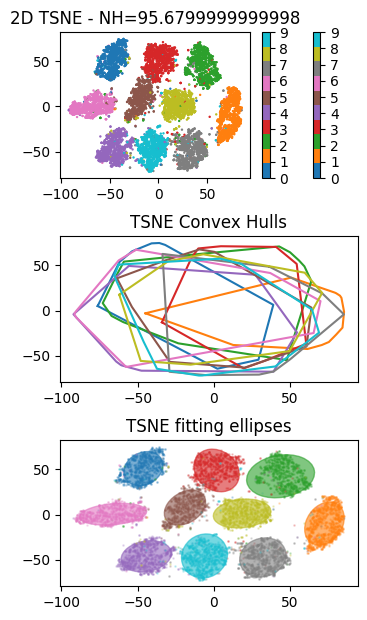

In [ ]:
visualization(X_test_tsne, y_test, conv_hulls, best_ells, "TSNE", nh)

In [ ]:
model_CNN_appele = loadModel("CNN")

Yaml Model  CNN .yaml loaded 
Weights  CNN .h5 loaded 


In [ ]:
learning_rate = 0.1
sgd = SGD(learning_rate)
model_CNN_appele.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
scores = model_CNN_appele.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model_CNN_appele.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model_CNN_appele.metrics_names[1], scores[1]*100))

loss: 3.83%
accuracy: 98.83%


In [ ]:
# On extrait la couche cachée
model_CNN_appele.pop()
model_CNN_appele.pop()

In [ ]:
representation2 = model_CNN_appele.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
tsne = TSNE(n_components=2, random_state=0, init='pca',  perplexity=30, verbose=2)
 # Fit and transform on the first 1000 data points
X_test_tsne2 = tsne.fit_transform(representation2)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 1.016s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.772323
[t-SNE] Computed conditional probabilities in 0.236s
[t-SNE] Iteration 50: error = 81.6708069, gradient norm = 0.0270277 (50 iterations in 4.003s)
[t-SNE] It

In [ ]:
# Computing convex hulls, best fitting ellipses & NH
conv_hulls = convexHulls(X_test_tsne2, y_test)
best_ells = best_ellipses(X_test_tsne2, y_test)
nh = neighboring_hit(X_test_tsne2, y_test)

<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
<ipython-input-30-6b9616b9ff05>:41: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positio

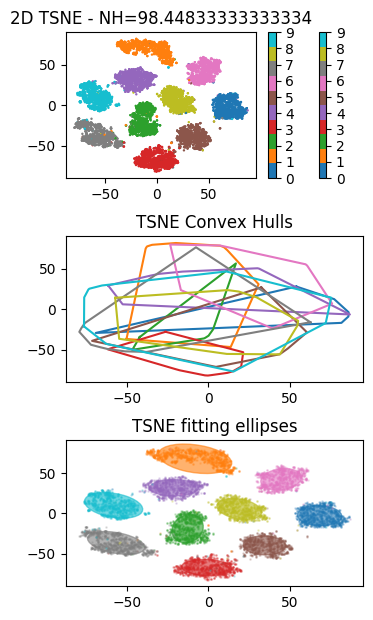

In [ ]:
visualization(X_test_tsne2, y_test, conv_hulls, best_ells, "TSNE", nh)

---
Manifold Untangling Resolution : 


-  Les représentations internes des couches cachées du Perceptron et du ConvNet sont visualisées avec t-SNE. On observe que les points des différentes classes sont mieux séparés dans l'espace des représentations internes, ce qui montre que les réseaux de neurones résolvent efficacement le problème de "manifold untangling".


- Les réseaux de neurones, en particulier les réseaux convolutifs, sont très efficaces pour transformer les données d'entrée en représentations internes où les classes sont bien séparées. Cela permet une classification plus facile et plus précise, ce qui est essentiel pour des tâches comme la reconnaissance d'images.



---

# Conclusion : 


Les réseaux de neurones, en particulier les réseaux convolutifs, sont très performants pour la classification d'images comme MNIST. Ils permettent de transformer les données d'entrée en représentations internes où les classes sont bien séparées, ce qui facilite la classification. Les méthodes de visualisation comme t-SNE et ACP permettent de mieux comprendre comment ces représentations internes sont structurées.


---
---